In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [116]:
data = pd.read_csv("semeion.data.txt",sep = "\s+",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [117]:
data.shape

(1593, 266)

In [118]:
#Перемешиваем строки таблицы
data = data.sample(frac=1).reset_index(drop=True)

In [119]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [120]:
def Draw(k):
    img = BinImg(k)
    plt.imshow(img, cmap='gray', interpolation='nearest');

In [121]:
def BinImg(k):
    binimg= [[0 for x in range(16)] for y in range(16)]
    row = DataRow(k)
    binimg = np.reshape(row, (-1,16))
    return binimg

In [122]:
def DataRow (k):
    row=data[k:k+1].values
    row = row[0][:-10]
    return row

In [123]:
def Check(k):
    row=data[k:k+1].values
    for i in range(10):
        if row[0][256+i]>0. :
            number =i 
    return number

In [124]:
BinImg(1550)

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

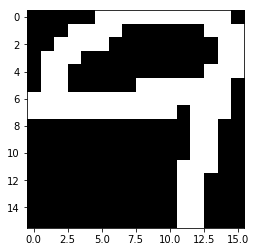

In [125]:
Draw (1550)

In [126]:
Check(1550)

9

In [127]:
def Train(val):
    x_train= []
    y_train= []
    for k in range(val):
        x_train.append(DataRow(k))
        y_train.append(Check(k))
    x_train= np.asarray(x_train)
    y_train= np.asarray(y_train)
    return x_train, y_train

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
def kNN(k, test_id):
    KNN = KNeighborsClassifier(k)
    KNN.fit(train_x, train_y)

    test = np.array(DataRow(test_id))
    test = test.reshape(1,-1)

    result = KNN.predict(test)[0]
    return result, Check(test_id)

In [130]:
#Параметры
TrainingSize= 1200
NeighboursQuantity =5

train = Train(TrainingSize)
train_x = train[0]
train_y = train[1]

In [131]:
def accuracy(NeighboursQuantity):
    correct = wrong =0
    for test in range(TrainingSize,data.shape[0]):
        res= kNN(NeighboursQuantity,test)
        if res[0]==res[1]:
            correct+=1
        else: 
            wrong+=1
    return 100*correct/(correct+wrong)
    
print ("Accuracy: " +str(accuracy(NeighboursQuantity))+"%" )
        

Accuracy: 88.54961832061069%


In [132]:
acc=[]
for nq in range(2,20):
    train = Train(TrainingSize)
    train_x = train[0]
    train_y = train[1]
    acc.append(accuracy(nq))

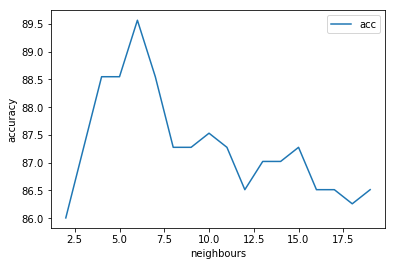

In [133]:
# Число соседей = 7 обеспечивает наибольшую точность
plt.plot(range(2,20),acc,label='acc')
plt.xlabel('neighbours')
plt.ylabel('accuracy')
plt.legend()